Try

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Specify the file path
file_path = "../data/raw/g_patent.tsv"

# Read the TSV file into a DataFrame
df = pd.read_csv(file_path, sep='\t')

# Display the DataFrame
df

C:\Users\HP\AppData\Local\Temp\ipykernel_20012\2165177947.py:5: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')


,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename
0,10000000,utility,2018-06-19,Coherent LADAR using intra-pixel quadrature de...,A frequency modulated (coherent) laser detecti...,B2,20,0,ipg180619.xml
1,10000001,utility,2018-06-19,Injection molding machine and mold thickness c...,The injection molding machine includes a fixed...,B2,12,0,ipg180619.xml
2,10000002,utility,2018-06-19,Method for manufacturing polymer film and co-e...,The present invention relates to: a method for...,B2,9,0,ipg180619.xml
3,10000003,utility,2018-06-19,Method for producing a container from a thermo...,The invention relates to a method for producin...,B2,18,0,ipg180619.xml
4,10000004,utility,2018-06-19,"Process of obtaining a double-oriented film, c...",The present invention relates to provides a do...,B2,6,0,ipg180619.xml
...,...,...,...,...,...,...,...,...,...
8701564,T998013,defensive publication,1980-09-02,Protection of insect pheromones from degradati...,NaN,I4,1,0,pftaps19800902_wk36.zip
8701565,T998014,defensive publication,1980-09-02,"Thiazolyl couplers, coupler compositions and p...",NaN,I4,3,0,pftaps19800902_wk36.zip
8701566,T999001,defensive publication,1980-10-07,Sack handling device,NaN,I4,1,0,pftaps19801007_wk41.zip
8701567,T999002,defensive publication,1980-10-07,Application of polymeric powders to a substrate,NaN,I4,7,0,pftaps19801007_wk41.zip


In [3]:
patent_types = df['patent_type'].unique()

patent_types

array(['utility', 'reissue', 'design', 'TVPP', 'plant',
       'statutory invention registration', 'defensive publication'],
      dtype=object)

In [4]:
df.dtypes

patent_id          object
patent_type        object
patent_date        object
patent_title       object
patent_abstract    object
wipo_kind          object
num_claims          int64
withdrawn           int64
filename           object
dtype: object

In [5]:
df['patent_date'] = pd.to_datetime(df['patent_date'])

In [6]:
df.dtypes

patent_id                  object
patent_type                object
patent_date        datetime64[ns]
patent_title               object
patent_abstract            object
wipo_kind                  object
num_claims                  int64
withdrawn                   int64
filename                   object
dtype: object

In [7]:
df_2001_onwards = df[df['patent_date'].dt.year >= 2001]

df_2001_onwards

,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename
0,10000000,utility,2018-06-19,Coherent LADAR using intra-pixel quadrature de...,A frequency modulated (coherent) laser detecti...,B2,20,0,ipg180619.xml
1,10000001,utility,2018-06-19,Injection molding machine and mold thickness c...,The injection molding machine includes a fixed...,B2,12,0,ipg180619.xml
2,10000002,utility,2018-06-19,Method for manufacturing polymer film and co-e...,The present invention relates to: a method for...,B2,9,0,ipg180619.xml
3,10000003,utility,2018-06-19,Method for producing a container from a thermo...,The invention relates to a method for producin...,B2,18,0,ipg180619.xml
4,10000004,utility,2018-06-19,"Process of obtaining a double-oriented film, c...",The present invention relates to provides a do...,B2,6,0,ipg180619.xml
...,...,...,...,...,...,...,...,...,...
8701055,RE49766,reissue,2023-12-26,Apparatus and method for interfacing between A...,An interface apparatus and method for transmis...,E1,44,0,ipg231226.xml
8701056,RE49767,reissue,2023-12-26,Switch-timing in a switched-capacitor power co...,"In a power converter, each gate-driving circui...",E1,41,0,ipg231226.xml
8701057,RE49768,reissue,2023-12-26,Wind power converter device and converter device,A wind power converter device is provided. The...,E1,16,0,ipg231226.xml
8701058,RE49769,reissue,2023-12-26,Secure electronic document delivery system,The secure electronic document delivery system...,E1,19,0,ipg231226.xml


In [8]:
yearly_counts = df.groupby(df['patent_date'].dt.year).size()

# Calculate the cumulative count
cumulative_counts = yearly_counts.cumsum()

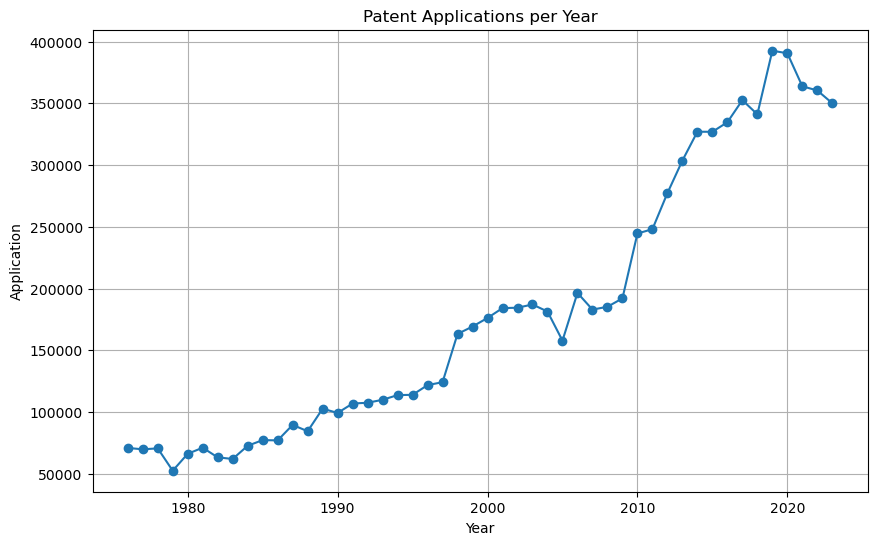

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title('Patent Applications per Year')
plt.xlabel('Year')
plt.ylabel('Application')
plt.grid(True)
plt.show()

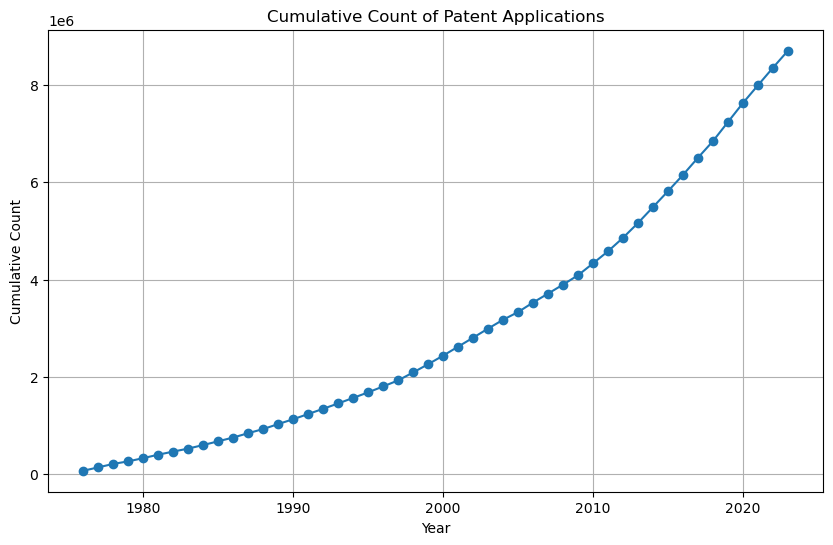

In [10]:
# Plotting the S-curve
plt.figure(figsize=(10, 6))
plt.plot(cumulative_counts.index, cumulative_counts.values, marker='o', linestyle='-')
plt.title('Cumulative Count of Patent Applications')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.show()

# Keywords Matchings

AI, Aviation, Laser, Composite, Space

In [11]:
keywords = ['artificial intelligence', 'aviation', 'space', 'laser', 'composite']

filter_condition = '|'.join(keywords)
filtered_df = df[df['patent_title'].str.contains(filter_condition, case=False)]

In [12]:
filtered_df.count()

patent_id          124288
patent_type        124288
patent_date        124288
patent_title       124288
patent_abstract    122136
wipo_kind          124288
num_claims         124288
withdrawn          124288
filename           124288
dtype: int64

In [13]:
yearly_counts_specified = filtered_df.groupby(filtered_df['patent_date'].dt.year).size()

# Calculate the cumulative count
cumulative_counts_specified = yearly_counts_specified.cumsum()

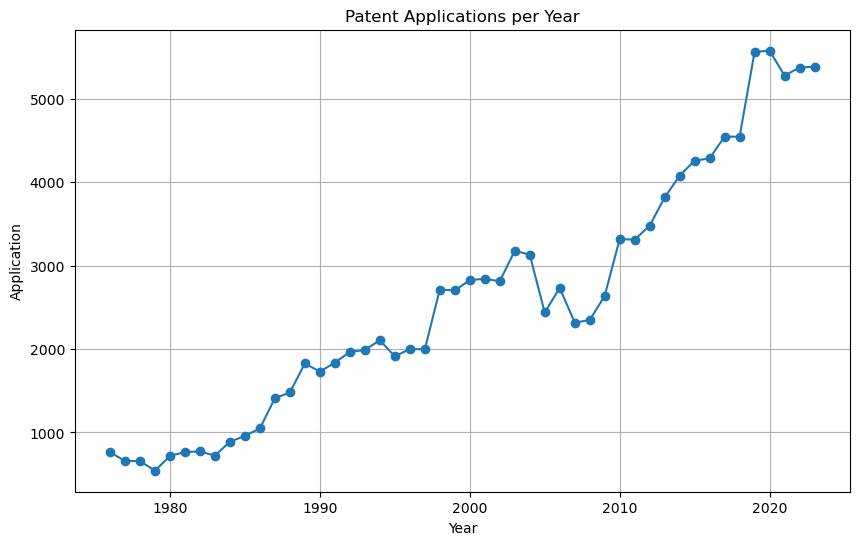

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts_specified.index, yearly_counts_specified.values, marker='o', linestyle='-')
plt.title('Patent Applications per Year')
plt.xlabel('Year')
plt.ylabel('Application')
plt.grid(True)
plt.show()

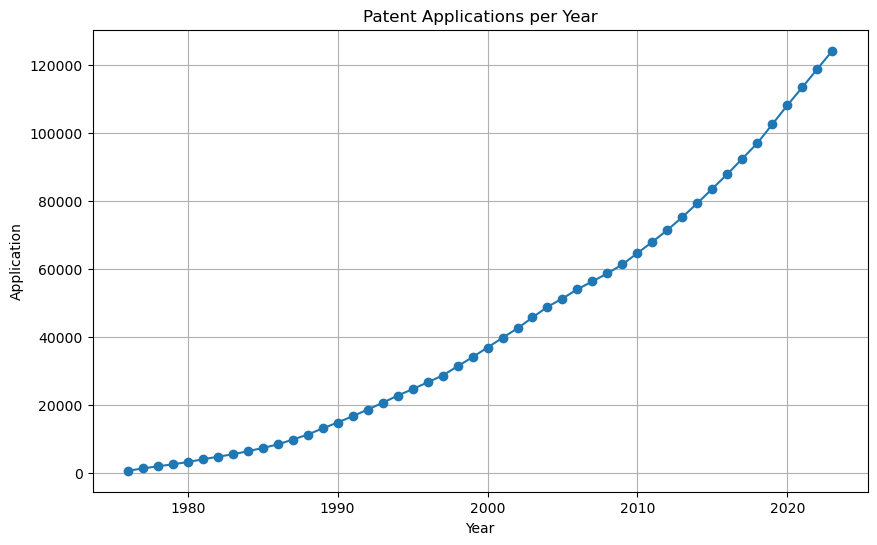

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_counts_specified.index, cumulative_counts_specified.values, marker='o', linestyle='-')
plt.title('Patent Applications per Year')
plt.xlabel('Year')
plt.ylabel('Application')
plt.grid(True)
plt.show()

In [16]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Applications")
    plt.grid(True)

In [18]:
def calculate_application_per_month(data: pd.DataFrame):
    """
    Calculate the cumulative count of patent applications per month.

    Parameters:
    - data: DataFrame containing the patent application data

    Returns:
    - DataFrame with the cumulative count of patent applications per month
    """
  
    data['patent_date'] = pd.to_datetime(data['patent_date'])

    data['Time'] = data['patent_date'].dt.to_period('M')

    # Group by year and month, and count the number of applications in each group
    applications_per_month = data.groupby('Time').size().reset_index(name='Applications')
    # applications_per_month['Cumulative_Count'] = applications_per_month['Applications_Per_Month'].cumsum()
    
    return applications_per_month

In [28]:
series = calculate_application_per_month(filtered_df)

series

C:\Users\HP\AppData\Local\Temp\ipykernel_20012\1688440709.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['patent_date'] = pd.to_datetime(data['patent_date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_20012\1688440709.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = data['patent_date'].dt.to_period('M')


,Time,Applications
0,1976-01,54
1,1976-02,61
2,1976-03,69
3,1976-04,51
4,1976-05,74
...,...,...
571,2023-08,524
572,2023-09,484
573,2023-10,626
574,2023-11,443


In [29]:
def parse_data_from_dataframe(df):
    times = []
    applications = []

    for i, row in df.iterrows():
        times.append(i)
        applications.append(float(row['Applications']))

    return times, applications

In [30]:
from dataclasses import dataclass

@dataclass
class G:
    TEMPERATURES_CSV = '../data/processed/cleaned_data.xlsx'
    times, applications = parse_data_from_dataframe(series)
    TIME = np.array(times)
    SERIES = np.array(applications)
    SPLIT_TIME = 150
    # WINDOW_SIZE = 64
    # BATCH_SIZE = 32
    # SHUFFLE_BUFFER_SIZE = 1000

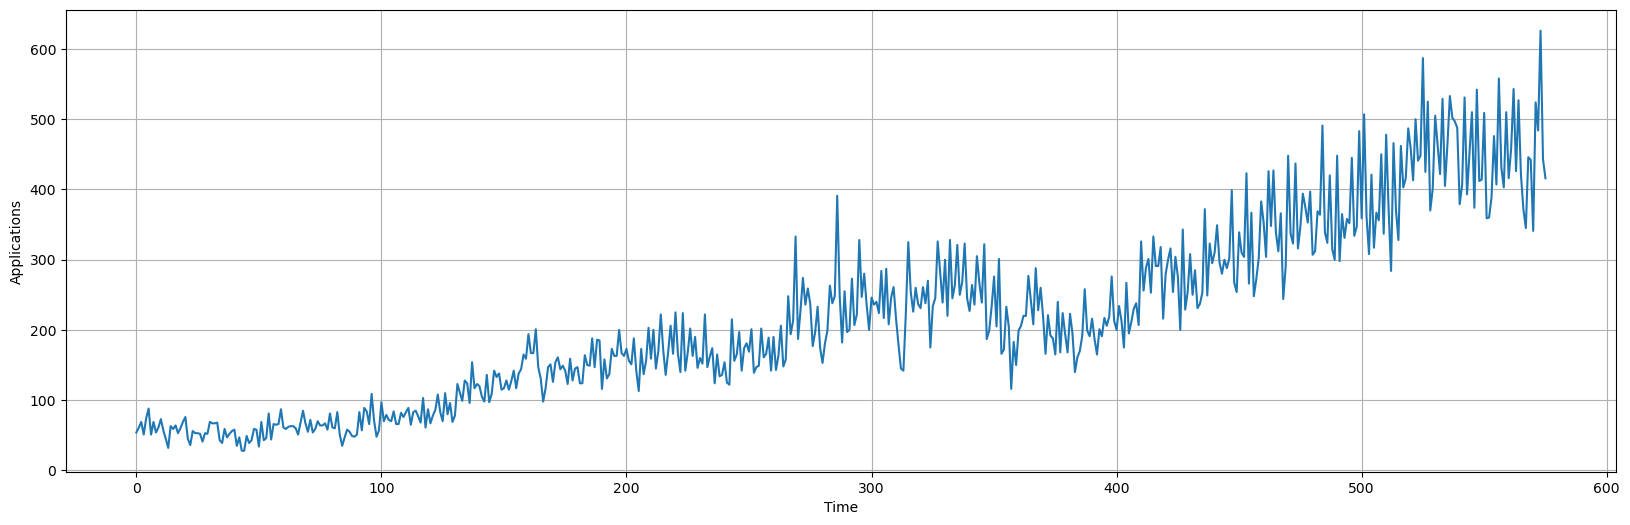

In [31]:
plt.figure(figsize=(20, 6))
plot_series(G.TIME, G.SERIES)
plt.show()